# M2 | Exploration Notebook

In this notebook, you will do a first exploration of the data set that you will use for your project. One part of this exploration is guided, i.e. we will ask you to solve specific questions (task 1-3). The other part is open, i.e. we will ask you to come up with your own exploration ideas (task 4). 

Please upload your solved notebook to Moodle (under Milestone 2 Submission)adding your SCIPER number in title, example: m2-lernnavi-456392.ipynb


## Brief overview of Lernnavi
[Lernnavi](https://www.lernnavi.ch) is an instrument for promoting part of the basic technical study skills in German and mathematics.


For the guided part of the exploration we will focus on the three main tables:
* *users*: demographic information of users.
* *events*: events done by the users in the platform.
* *transactions*: question and answer solved by user.

### Users
* user_id: unique identifier of user in database.
* gender: only three values: M male, F female or missing. 
* canton: swiss canton.
* class_level: school year in swiss system.


### Events
* event_id: unique identifier of event in database.
* user_id: user who peformed the event.
* timestamp: timestamp of event.
* category: classification of action (task, general, statistics, etc).
* action: type of action performed.
* event_type: whether the students viewed or clicked in the event.
* transaction_token: used to link to transactions table.
* session_id: session during which the event took place.
* tracking_data: optional content associated to this event (e.g., the new points mastered for a topic).


### Transactions
* transaction_id: unique identifier of transaction in database.
* transaction_token: used to link to events table.
* user_id: user who performed the transaction.
* document_id: document that was answered in transaction.
* document_version: version of document that was answered.
* evaluation: whether the user answered correctly or not. It is possible that it was only partially right. 
* input: answer the user gave.
* start_time: timestamp of when the user started answering.
* commit_time: timestamp of when the user submitted the answer.
* user_agent: the browser that the user used.
* validation: used to validate the format of the input.
* solution: solution to question.
* type: type of question that was answered. 


In [2]:
# Import the tables of the data set as dataframes.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from sklearn.model_selection import train_test_split
from pymer4.models import Lm
from pymer4.models import Lmer
from sklearn.metrics import mean_squared_error

DATA_DIR = './data' #You many change the directory

users = pd.read_csv('{}/users.csv.gz'.format(DATA_DIR))
events = pd.read_csv('{}/events.csv.gz'.format(DATA_DIR))
transactions = pd.read_csv('{}/transactions.csv.gz'.format(DATA_DIR))

In [35]:
users.head()

,user_id,gender,canton,class_level
0,387604,NaN,NaN,NaN
1,387605,NaN,NaN,NaN
2,387608,NaN,NaN,NaN
3,387615,MALE,SG,Gymnasium - 3. Jahr
4,387643,NaN,NaN,NaN


In [4]:
users.dtypes

user_id         int64
gender         object
canton         object
class_level    object
dtype: object

In [5]:
events.head()

,event_id,user_id,timestamp,category,action,event_type,transaction_token,session_id,tracking_data
0,62,393211,1621583814885,TASK,VIEW_QUESTION,VIEW,7a10ca52-ffb5-4069-8800-0dc86d778e94,NaN,NaN
1,63,393211,1621583898912,TASK,SUBMIT_ANSWER,CLICK,7a10ca52-ffb5-4069-8800-0dc86d778e94,NaN,NaN
2,64,393211,1621583907207,TASK,NEXT,CLICK,7a10ca52-ffb5-4069-8800-0dc86d778e94,NaN,NaN
3,65,393211,1621583907589,TASK,VIEW_QUESTION,VIEW,88fdcaad-f73b-46a2-b561-d262f2441442,NaN,NaN
4,66,393211,1621584222588,TASK,SUBMIT_ANSWER,CLICK,88fdcaad-f73b-46a2-b561-d262f2441442,NaN,NaN


In [6]:
events.dtypes

event_id               int64
user_id                int64
timestamp              int64
category              object
action                object
event_type            object
transaction_token     object
session_id           float64
tracking_data         object
dtype: object

In [7]:
transactions.head()

,transaction_id,transaction_token,user_id,document_id,document_version,evaluation,input,start_time,commit_time,user_agent,validation,solution,type
0,1061991,cf99b0d7-279a-4ae0-8ef3-a15514e350b6,387604.0,111K3PY6sbr8ac1mRGpse1,87668,NaN,NaN,1637146446763,NaN,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,NaN,NaN,NaN
1,1066631,13e3086b-1c4e-4d28-87a3-0582ccf495c6,387604.0,111K3PY6sbr8ac1mRGpse1,87668,NaN,NaN,1637233737283,NaN,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,NaN,NaN,NaN
2,1011975,6f292166-86bd-4ec9-81e8-22e9033d571e,387604.0,111K3PY6sbr8ac1mRGpse1,87668,CORRECT,"{""type"": ""MULTIPLE_CHOICE"", ""selections"": {""0""...",1636444658255,1.636445e+12,NaN,PASS,"{""type"": ""MULTIPLE_CHOICE"", ""choices"": [{""cont...",MULTIPLE_CHOICE
3,1020790,79a7d731-a36b-4529-a11b-108b9f877a04,387604.0,111K3PY6sbr8ac1mRGpse1,87668,CORRECT,"{""type"": ""MULTIPLE_CHOICE"", ""selections"": {""0""...",1636561847705,1.636562e+12,NaN,PASS,"{""type"": ""MULTIPLE_CHOICE"", ""choices"": [{""cont...",MULTIPLE_CHOICE
4,1061970,a45b6464-371e-47f4-842c-34f9e345b4ec,387604.0,111K3PY6sbr8ac1mRGpse1,87668,CORRECT,"{""type"": ""MULTIPLE_CHOICE"", ""selections"": {""0""...",1637146373965,1.637146e+12,NaN,PASS,"{""type"": ""MULTIPLE_CHOICE"", ""choices"": [{""cont...",MULTIPLE_CHOICE


In [8]:
transactions.dtypes

transaction_id         int64
transaction_token     object
user_id              float64
document_id           object
document_version       int64
evaluation            object
input                 object
start_time             int64
commit_time          float64
user_agent            object
validation            object
solution              object
type                  object
dtype: object

In [9]:
# change dtypes to correct ones
transactions['user_id']=transactions['user_id'].astype('int')

## Task 1: Simple Statistics

In this task you are asked to do a first coarse exploration of the data set, using simple statistics and visualizations.

#### a) How many distinct participants do we have in the data set?


In [10]:
print('Number of distinct users in the dataset users is {0}'.format(len(users['user_id'].unique())))

Number of distinct users in the dataset users is 13695


In [11]:
print('Number of distinct users in the dataset events is {0}'.format(len(events['user_id'].unique())))

Number of distinct users in the dataset events is 10113


In [12]:
print('Number of distinct users in the dataset transactions is {0}'.format(len(transactions['user_id'].unique())))

Number of distinct users in the dataset transactions is 10493


#### b) How many transactions were done per user? Please provide a visualization and discuss the distribution.

###### Per every user

In [13]:
tpu=transactions.groupby('user_id').count()

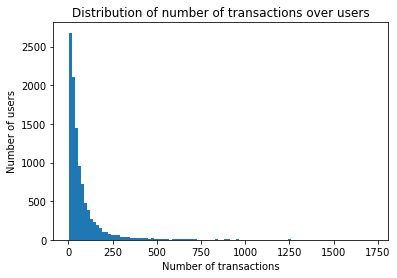

In [14]:
plt.hist(tpu[['transaction_id']],bins=100)
plt.title('Distribution of number of transactions over users')
plt.xlabel('Number of transactions')
plt.ylabel('Number of users')
None

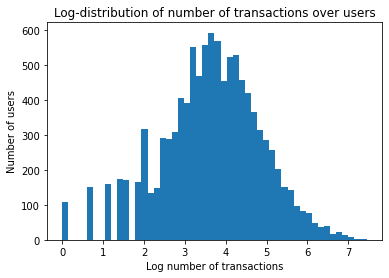

In [15]:
plt.hist(np.log(tpu['transaction_id']),bins=50)
plt.title('Log-distribution of number of transactions over users')
plt.xlabel('Log number of transactions')
plt.ylabel('Number of users')
None

*As we can see, there are a lot of users that did few transactions and not so many that did a lot. Therefore, it is almost a log-normal distribution and the mean is not representative in this situation, so it is better to use median.*

###### Statistics

In [16]:
print('Mean is {0}'.format(round(np.mean(tpu['transaction_id']),2)))
print('Median is {0}'.format(round(np.median(tpu['transaction_id']),2)))

Mean is 76.24
Median is 40.0


#### c) Which are the 10 most popular event actions? Please provide a visualization of the frequency of the top 10 event actions.

Hint: See actions in table events.

In [17]:
top_actions=events.groupby('action').count().sort_values('event_id',ascending=False)
top10_actions=top_actions[:10].copy()

In [18]:
top10_actions

,event_id,user_id,timestamp,category,event_type,transaction_token,session_id,tracking_data
action,,,,,,,,
PAGE_VISIT,653725,653725,653725,653725,653725,0,0,653725
REVIEW_TASK,513389,513389,513389,513389,513389,513389,403876,0
SUBMIT_ANSWER,419862,419862,419862,419862,419862,419862,319639,0
NAVIGATE_DASHBOARD,350821,350821,350821,350821,350821,0,0,350821
NEXT,277020,277020,277020,277020,277020,277020,181023,0
WINDOW_VISIBLE_FALSE,240660,240660,240660,240660,240660,0,0,240660
WINDOW_VISIBLE_TRUE,199287,199287,199287,199287,199287,0,0,199287
VIEW_QUESTION,154592,154592,154592,154592,154592,154592,114288,0
OPEN_FEEDBACK,87071,87071,87071,87071,87071,69787,69787,87071


In [19]:
#The least frequent actions
top_actions[-10:]

,event_id,user_id,timestamp,category,event_type,transaction_token,session_id,tracking_data
action,,,,,,,,
GO_TO_BUG_REPORT,3660,3660,3660,3660,3660,3527,2450,0
GO_TO_COMMENTS,3640,3640,3640,3640,3640,3640,2222,0
LOGOUT,2064,2064,2064,2064,2064,0,0,0
PRETEST,1709,1709,1709,1709,1709,0,0,0
REJECT_PROGRESS,1200,1200,1200,1200,1200,0,1200,1200
SHARE_SESSION,403,403,403,403,403,0,403,403
NAVIGATE_SURVEY,219,219,219,219,219,0,0,0
REQUEST_HINT,185,185,185,185,185,185,116,185
GO_TO_SESSION,182,182,182,182,182,0,182,0


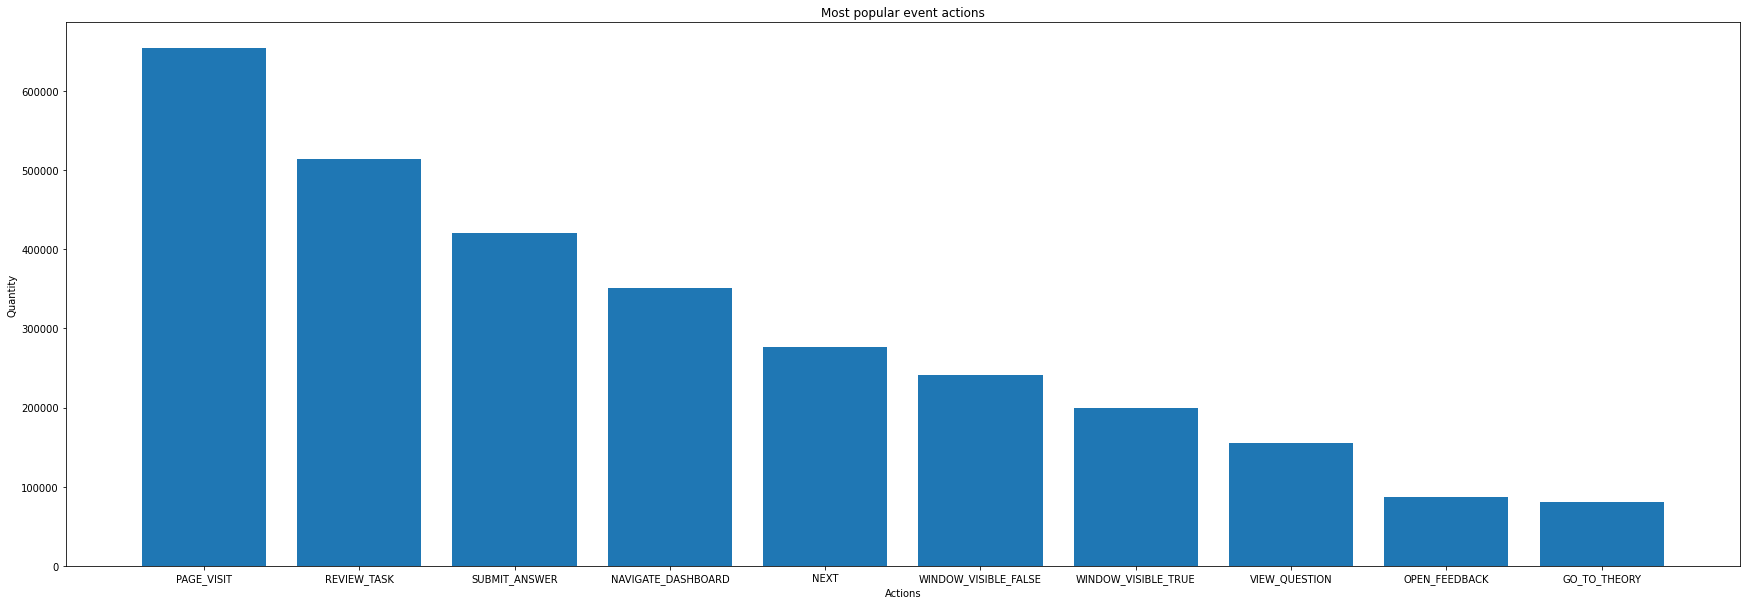

In [20]:
plt.figure(figsize=(30,10))
plt.bar(top10_actions.index,top10_actions['event_id'])
plt.title('Most popular event actions')
plt.xlabel('Actions')
plt.ylabel('Quantity')
None

As we can see, the most obvious actions are the most popular (PAGE_VISIT,REVIEW_TASK and so on) and the least frequent is SHARE.

Something interesting:

1. *Number of NEXT events is significantly smaller than PAGE_VISIT, that's why more than a half of pages were visited without continuing.*
2. *Not all the tasks were answered, but most of them (REVIEW_TASK~SUBMIT_ANSWER)*

## Task 2: Static Analysis

In this second task, you will do a univariate an multivariate exploration of some aggregated features.

**!!! After some analysis and number of trials I decided to drop all rows containing NaN values in final dataset in this task. It allows to make explorations more qualitative taking into consideration only active users.!!!** 

#### a) Build a data frame containing one row per user:

``[user_id, gender, num_events, num_questions, percentage_correct, num_reading]``


The features are defined as follows:

- **num_questions**: total number of questions the student answered (hint: action event = submit answer)

- **num_events**: total number of events of the student  

- **percentage_correct**: number of correct answers/total number of answers (hint: evaluation = correct). If desired, you may assign a weight of 0.5 to partially correct answers. 

- **num_reading**: total number of theory reading events  (hint: action event = go to theory)

In [21]:
#find gender
gend=pd.merge(users, events,how='right',on='user_id')[['gender','user_id']].drop_duplicates().copy()

#connect transactions and events
tr_ev=pd.merge(transactions,events,how='inner', on='transaction_token',suffixes=('','_y')).copy()

#By total number of answers we assume number of answers with evaluation equal to CORRECT or PARTIAL or WRONG
perc_correct=(tr_ev[tr_ev['evaluation']=='CORRECT'].groupby('user_id').count()[['transaction_id']]/tr_ev[(tr_ev['evaluation']=='CORRECT') | (tr_ev['evaluation']=='PARTIAL') | (tr_ev['evaluation']=='WRONG')].groupby('user_id').count()[['transaction_id']]).copy()

num_quest=events[events['action']=='SUBMIT_ANSWER'].groupby('user_id').count()[['event_id']].copy()
num_ev=events.groupby('user_id').count()[['event_id']].copy()
num_reading=events[events['action']=='GO_TO_THEORY'].groupby('user_id').count()[['event_id']].copy()

df=pd.merge(pd.merge(pd.merge(pd.merge(gend,num_ev,how='left',on='user_id'),num_quest,how='left',on='user_id'),perc_correct,on='user_id',how='left'),num_reading,how='left',on='user_id').copy()
df.columns=['gender','user_id','num_events','num_questions','percentage_correct','num_reading']

#Drop NaNs for all columns because it is more interesting to do some analysis on people who had some activity
df=df.dropna(subset=['num_events','num_questions','num_reading','percentage_correct']).copy()

df=df.set_index('user_id').copy()
print('Shape of the dataframe is ',df.shape)
df.head()

Shape of the dataframe is  (4069, 5)


,gender,num_events,num_questions,percentage_correct,num_reading
user_id,,,,,
388047,MALE,738,81.0,0.385366,2.0
388363,NaN,1185,122.0,0.554817,24.0
393224,FEMALE,201,54.0,0.509091,1.0
393232,FEMALE,157,38.0,0.421488,6.0
393230,NaN,111,33.0,0.505263,1.0


b) Perform a univariate analysis (including descriptive statistics and visualizations) for the five features (gender, num_events, num_questions, percentage_correct, num_reading) of your dataframe. Please check the lecture slides regarding information on how to perform a univariate analysis for categorical and numerical features. Discuss your results: how are the features distributed? Are there any anomalities?

#### Descriptive statistics

In [22]:
feature_list = [df['num_events'], df['num_questions'],df['percentage_correct'],df['num_reading']]
data = {'Mean': np.mean(feature_list,1),
        'Median':np.median(feature_list,1),
        'Mode': (stats.mode(feature_list,axis=1)[0])[:,0],
        'Variance':np.var(feature_list,1),
        'Std':np.std(feature_list,1),
        'Minimum': np.min(feature_list,1),
        '25%': np.percentile(feature_list, 25, axis=1),
        '75%': np.percentile(feature_list, 75, axis=1),
        'Maximum': np.max(feature_list,1)}
desc_stats_df = pd.DataFrame(data, index =['num_events','num_questions','percenntage_correct','num_reading'])
display(desc_stats_df)

,Mean,Median,Mode,Variance,Std,Minimum,25%,75%,Maximum
num_events,601.027034,346.000000,155.0,648074.254369,805.030592,14.000000,184.00000,669.000000,10044.0
num_questions,70.935856,35.000000,12.0,11511.020462,107.289424,1.000000,17.00000,78.000000,1054.0
percenntage_correct,0.460027,0.445783,1.0,0.040387,0.200966,0.021978,0.31931,0.585366,1.0
num_reading,18.543623,6.000000,2.0,3209.155937,56.649413,1.000000,2.00000,15.000000,2404.0


#### Scatter plots

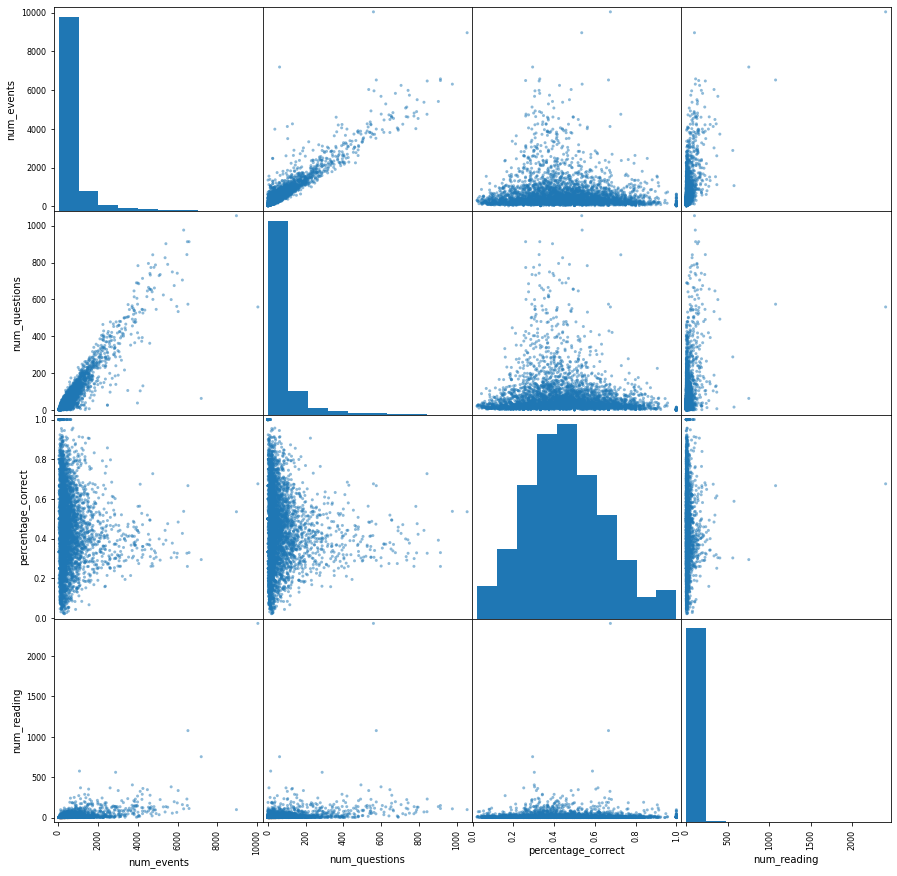

In [23]:
pd.plotting.scatter_matrix(df,figsize=(15,15))
None

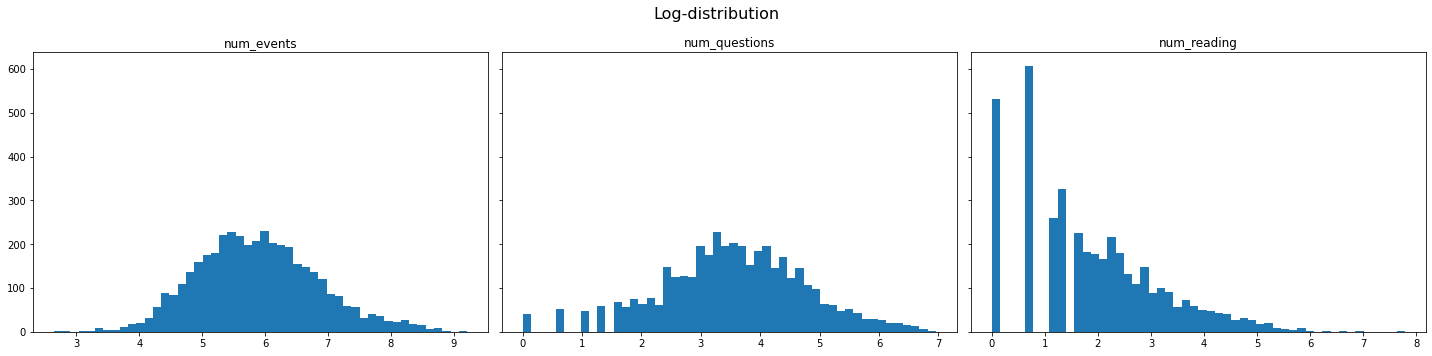

In [24]:
n_bins=50
fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True,figsize=(20,5))
axs[0].hist(np.log(df['num_events']), bins=n_bins)
axs[0].set_title('num_events')
axs[1].hist(np.log(df[df['num_questions']!=0]['num_questions']), bins=n_bins)
axs[1].set_title('num_questions')
axs[2].hist(np.log(df[df['num_reading']!=0]['num_reading']), bins=n_bins)
axs[2].set_title('num_reading')
fig.suptitle('Log-distribution', fontsize=16)
None

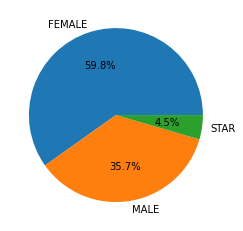

In [25]:
val_counts = df.gender.value_counts()/np.sum(df.gender.value_counts())
labels = val_counts.index.to_list()
plt.pie(val_counts, labels = labels,autopct='%1.1f%%')
plt.show()

In [26]:
#change STAR gender to nan
df['gender']=np.where(df['gender']=='STAR',np.nan,df['gender'])

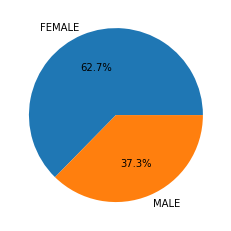

In [27]:
val_counts = df.gender.value_counts()/np.sum(df.gender.value_counts())
labels = val_counts.index.to_list()
plt.pie(val_counts, labels = labels,autopct='%1.1f%%')
plt.show()

*As we can see, there was a value STAR in gender column, which I changed to nan. Also only percentage_correct is normally distributed, while num_events and num_questions are log-normally distributed. It is difficult to make any assumptions about other features distributions. The number of women in our dataset is slightly more than the number of men (~63/37%). Moreover, we can see a serious correlation between num_events and num_questions that can be explained as more questions student answer-more events on the platform have been done and will be explored later.
It is strange that percentage_correct is not connected with num_reading as if theoty recalling does not help to answer questions.*

c) Come up with two additional features on your own and add them to the dataframe. Please provide an explanation/description of your features as well as an argument/hypothesis of why you think these features are interesting to explore.

In [29]:
tr_ev['corr_diff']=((tr_ev[(tr_ev['evaluation']=='CORRECT')]['commit_time']-tr_ev[(tr_ev['evaluation']=='CORRECT')]['start_time'])/1000)
tr_ev['wr_diff']=((tr_ev[(tr_ev['evaluation']=='WRONG') | (tr_ev['evaluation']=='PARTIAL')]['commit_time']-tr_ev[(tr_ev['evaluation']=='WRONG') | (tr_ev['evaluation']=='PARTIAL')]['start_time'])/1000)
corr_wr=tr_ev[['user_id','corr_diff','wr_diff']].groupby('user_id').mean().copy()
df=pd.merge(df,corr_wr,how='left',on='user_id').copy()

In [30]:
ans_feed=((tr_ev[tr_ev['evaluation']=='WRONG'].groupby('user_id').count()[['transaction_id']])/tr_ev[tr_ev['action']=='OPEN_FEEDBACK'].groupby('user_id').count()[['transaction_id']]).copy()
ans_feed['transaction_id']=ans_feed['transaction_id'].fillna(ans_feed['transaction_id'].max()).copy()
ans_feed=ans_feed.rename(columns={"transaction_id": "curiosity"}).copy()
df=pd.merge(df,ans_feed,how='left',on='user_id').copy()

*First of all, I added a feature called curiosity. It is a ratio of number of WRONG answers to number of OPEN_FEEDBACK actions by user. I assume that OPEN_FEEDBACK means opening feedback to the given answer with the description of the right one. This feature shows how curious are users: are they interested in learning something or just answer questions without any sense. Moreover, due to the fact that the bigger this feature the less curious user is, I filled all the nans values (where there were no OPEN_FEEDBACK actions) with the maximal of existing value. Because not opening the feedback means absense of curiosity as well.*

*Another two features are an average time spent to give a correct answer and an average time to give a PARTIAL or WRONG answer. I will try to check a hypothesis that in average you need more time to answer a question correctly.*

d) Perform a univariate analysis of your features (including descriptive statistics and visualization). What can you observe? Do the results confirm your hypotheses?

In [31]:
df[['curiosity','corr_diff','wr_diff']].describe()

,curiosity,corr_diff,wr_diff
count,3670.000000,4.069000e+03,3.966000e+03
mean,70.462197,2.347680e+04,2.576699e+04
std,71.501729,4.939844e+05,2.432062e+05
min,0.026316,2.307000e+00,3.265500e+00
25%,1.797222,4.040946e+01,6.207823e+01
50%,14.500000,6.844838e+01,1.054635e+02
75%,148.000000,1.448347e+02,2.970404e+02
max,148.000000,2.082627e+07,9.571156e+06


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


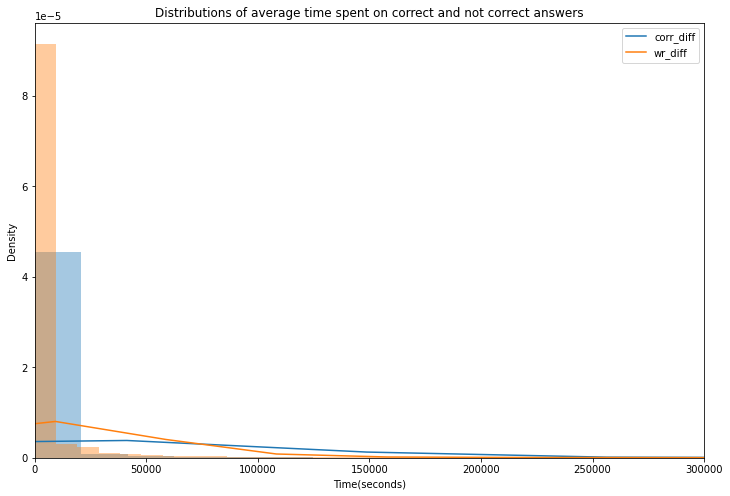

In [32]:
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(df['corr_diff'],bins=1000)
sns.distplot(df['wr_diff'],bins=1000)
ax.set_xlim([0, 300000])
ax.set_title('Distributions of average time spent on correct and not correct answers')
plt.legend(labels=["corr_diff","wr_diff"])
ax.set_xlabel('Time(seconds)')
None

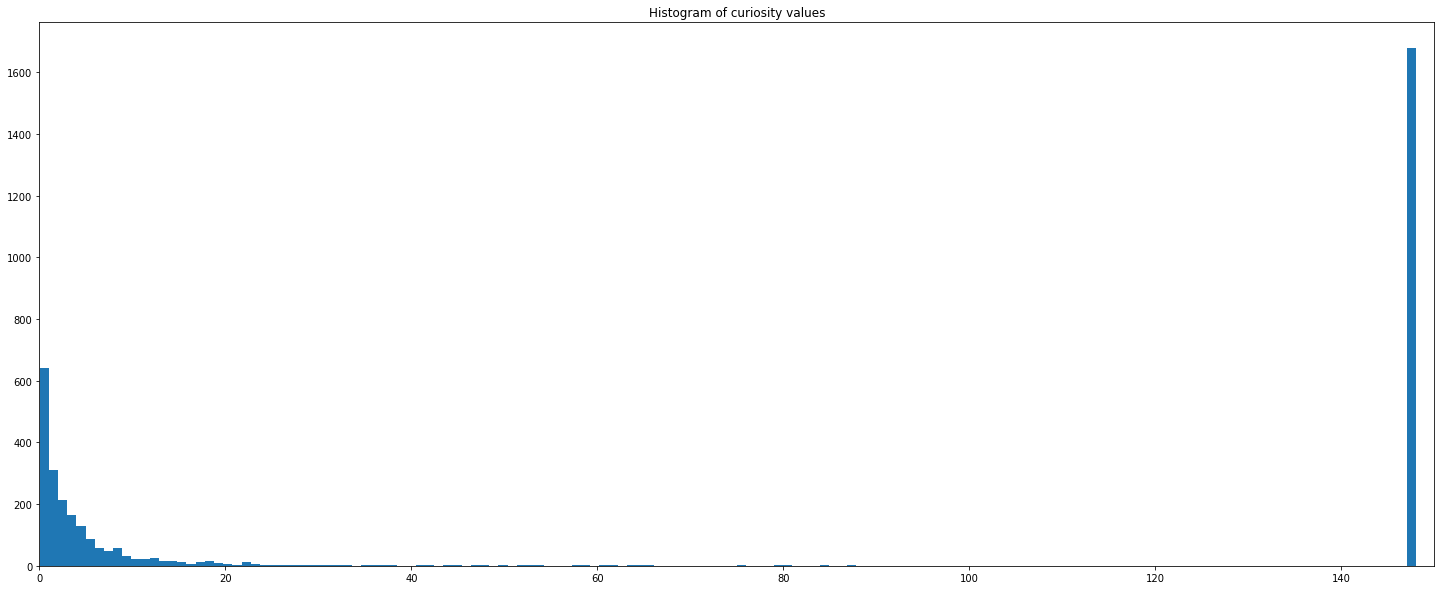

In [33]:
fig, ax = plt.subplots(figsize=(25,10))
plt.hist(df['curiosity'],bins=150)
ax.set_xlim([0,150])
ax.set_title('Histogram of curiosity values')
None

*Firstly, my hypothesis about average time cannot be accepted, because as we can see from statistics and distribution time spent on not correct answers is higher than time spent on right ones. It can be explained by the fact that if you know the right answer then you do not need to waste too much time on it, but if you have any doubts you will think a lot.*

**It should be mentioned that there are some anomalies in average time data (too big values). It looks like users keep the page open to the whole day**

*Secondly, among people who have ever seen feedback (left side of the histogram) there are a lot of users, who have a small value of this feature and therefore are interested in learning. But from the right part of the plot it is obvious that a lot of users have never opened feedback. Maybe it is because of users, maybe the button is located in inconvenient place on the website.*

e) Perform a multivariate analysis for two pairs of features of your choice. Please provide a metric and a visualization for both pairs. Please discuss: why did you choose these two pairs? What was your hypothesis? Do the results confirm your hypothesis?

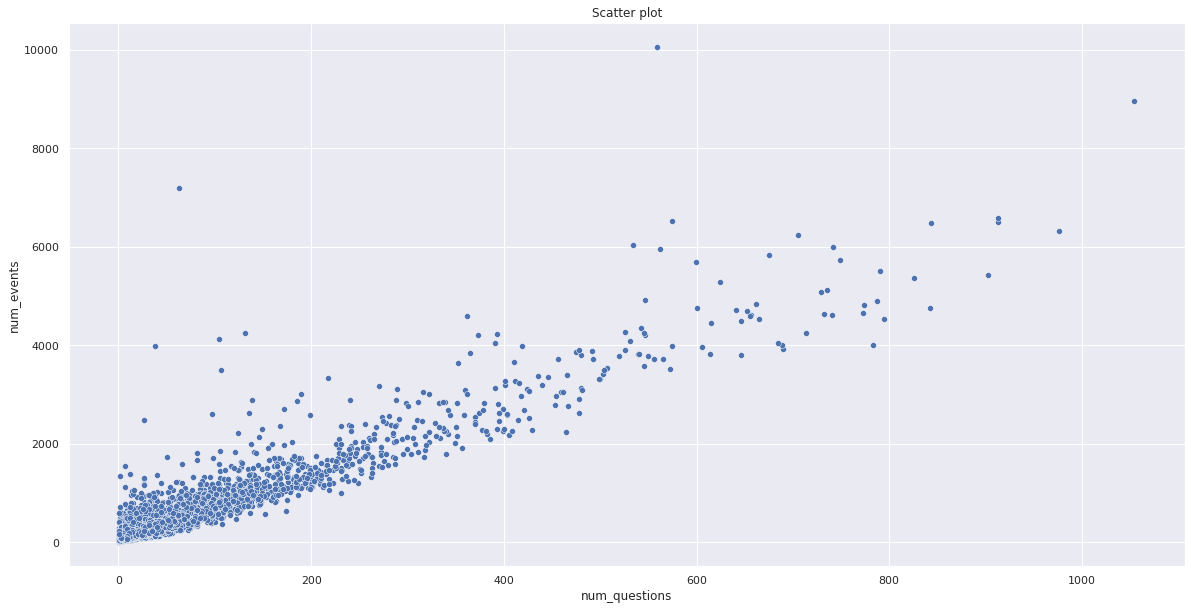

Pearson correlation is 0.931


In [36]:
plt.title('Scatter plot')
sns.scatterplot(data= df, y = 'num_events', x ='num_questions')
plt.xlabel("num_questions")
plt.ylabel("num_events")
plt.show()
sns.set(rc={'figure.figsize':(20,10)})
print('Pearson correlation is {0}'.format(round(scipy.stats.pearsonr(df['num_events'],df['num_questions'])[0],3)))

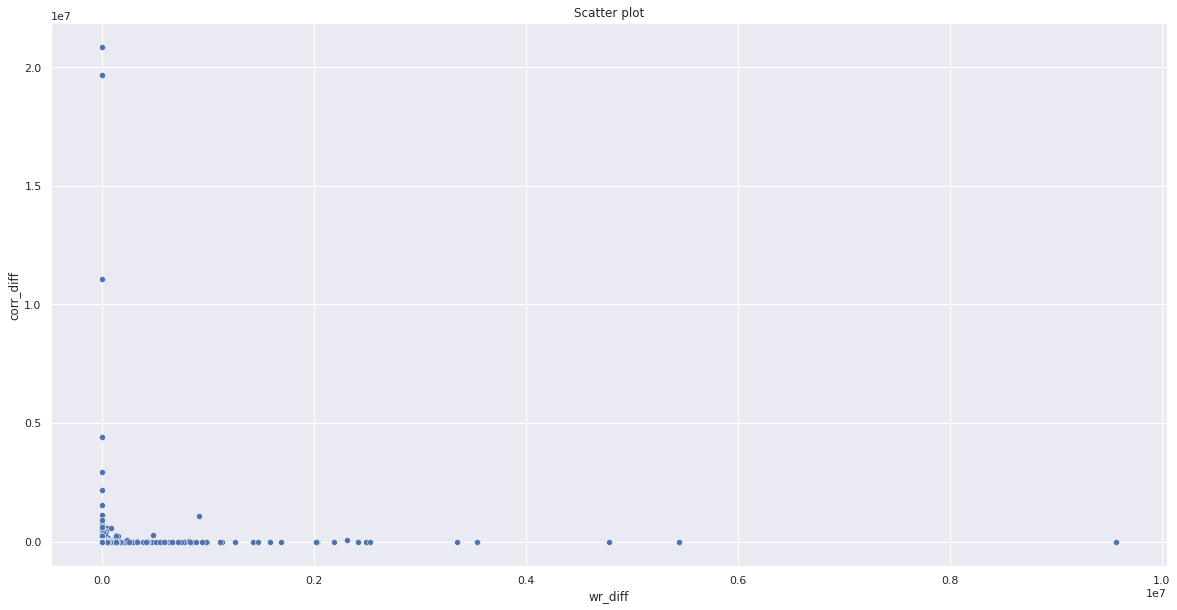

Pearson correlation is -0.001


In [37]:
diff=df.dropna(subset=['corr_diff','wr_diff'])
plt.title('Scatter plot')
sns.scatterplot(data= diff, y = 'corr_diff', x ='wr_diff')
plt.xlabel("wr_diff")
plt.ylabel("corr_diff")
plt.show()
sns.set(rc={'figure.figsize':(20,10)})
print('Pearson correlation is {0}'.format(round(scipy.stats.pearsonr(diff['corr_diff'].dropna(),diff['wr_diff'].dropna())[0],3)))

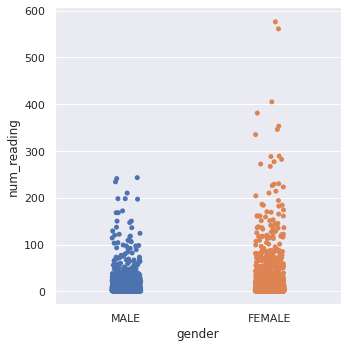

In [38]:
sns.catplot(x="gender", y="num_reading", data=df)
None

1. As it was expected, there is significantly strong (93%) correlation between number of events (~time spent on platform) with the number of answered questions.
2. I assumed that users systematically spend more time on correct answers,but it is false .There is no correlation between average time spent on correct and wrong answers (~0).
3. Women are more likely to check theory. Even though the dataset is female-biased.

# Task 3: Time-Series Analysis

In the last task, you will perform a time-series analysis.

**!!! In this task I filled NaNs with zeros everywhere except percentage_correct, because the value '0' in this feature means that the percentage of correct answers is 0 and it affects the quality of answers for the whole dataset, while NaN means just absence of information. In other features absence of information can be replaceed with 0. !!!**


#### a) Build a data frame containing one row per user per week:

``[user_id, week, num_events, num_questions, percentage_correct, num_reading]``


The features are defined as follows:

- **num_questions**: total number of questions the student answered **per week**(hint: action event = submit answer).

- **num_events**: total number of events of the student per week.

- **percentage_correct**: number of correct answers/total number of answers  **per week** (hint: evaluation = correct). If desired, you may assign a weight of 0.5 to partially correct answers.

- **num_reading**: total number of theory reading events **per week** (hint: action event = go to theory).

Where week 0 is the first week the specific user solved a task in the platform, i.e., the user's earliest entry in the transactions table.

Hint: You may extract the week of the year (dt.week) from the timestamps. 

In [39]:
import datetime

In [40]:
events['week']=(events.timestamp/1e3).apply(datetime.datetime.fromtimestamp).dt.isocalendar().week

In [41]:
#merge transactions and events
tr_ev=pd.merge(transactions,events,how='inner', on='transaction_token',suffixes=('','_y')).copy()

#By total number of answers we assume number of answers with evaluation equal to CORRECT or PARTIAL or WRONG
perc_correct=(tr_ev[tr_ev['evaluation']=='CORRECT'].groupby(['user_id','week']).count()[['transaction_id']]/tr_ev[(tr_ev['evaluation']=='CORRECT') | (tr_ev['evaluation']=='PARTIAL') | (tr_ev['evaluation']=='WRONG')].groupby(['user_id','week']).count()[['transaction_id']]).copy()

#total number of questions the student answered per week
num_quest=events[events['action']=='SUBMIT_ANSWER'].groupby(['user_id','week']).count()[['event_id']].copy()
#total number of events of the student per week
num_ev=events.groupby(['user_id','week']).count()[['event_id']].copy()
#total number of theory reading events per week
num_reading=events[events['action']=='GO_TO_THEORY'].groupby(['user_id','week']).count()[['event_id']].copy()

#merge all columns
dff=pd.merge(pd.merge(pd.merge(num_ev,num_quest,how='left',on=['user_id','week']),perc_correct,on=['user_id','week'],how='left'),num_reading,how='left',on=['user_id','week']).copy()
#rename columns
dff.columns=['num_events', 'num_questions', 'percentage_correct', 'num_reading']

dff=dff.reset_index().copy()

#change week number for every student (assume the first week as 0)
df_new=pd.merge(dff,dff.groupby('user_id').min()[['week']].rename(columns={'week':'min'}),on='user_id',how='left').copy()
df_new['week']=df_new['week']-df_new['min']

dff=df_new[['user_id','week','num_events', 'num_questions', 'percentage_correct', 'num_reading']].copy()

#Remain first 13 weeks for every student
first_weeks=pd.merge(pd.Series(dff['user_id'].unique(),name='user_id').to_frame(),pd.Series(np.arange(13),name='week').to_frame(),how='cross').copy()

#Final dataset with all columns for first 13 weeks for every student
df_weeks=pd.merge(first_weeks,dff,how='left',on=['user_id','week']).copy()

#Fill NaNs with 0 for all columns except percentage_correct and gender because in these columns '0' will mean different
df_weeks['num_questions']=df_weeks['num_questions'].fillna(0)
df_weeks['num_events']=df_weeks['num_events'].fillna(0)
df_weeks['num_reading']=df_weeks['num_reading'].fillna(0)

#df_weeks=df_weeks.set_index('user_id').copy()
print('Shape of the dataframe is ',df_weeks.shape)
df_weeks.head()

Shape of the dataframe is  (131469, 6)


,user_id,week,num_events,num_questions,percentage_correct,num_reading
0,387604,0,6.0,1.0,NaN,0.0
1,387604,1,17.0,2.0,1.0,0.0
2,387604,2,35.0,1.0,NaN,5.0
3,387604,3,3.0,0.0,NaN,0.0
4,387604,4,0.0,0.0,NaN,0.0


You can limit the number of weeks to 13, i.e. for each user we just look at the first 13 weeks of data.
Yoy may change and justify your choice for the number of weeks.

*I limited the number of weeks for each user to 13 (from 0 to 12)*

#### b) Select two features and analyze their behavior over time. Please provide a hypothesis and visualization for both features. For ideas on how to perform a time series exploration, please check the lecture slides and notebook. Discuss your results: what do you observe? Do the results confirm your hypotheses?

###### Regression

In [42]:
df_weeks['num_events_next'] = df_weeks.groupby('user_id')['num_events'].shift(-1)
loc_outcome = df_weeks.columns.get_loc('num_events_next')

In [43]:
def aggregate_weeks(df,loc):
    """
    We aggregate the data of the previous weeks
    """
    df_without = df.iloc[:,:loc]
    df_with = df.loc[:,['user_id','week','num_events_next']]
    week_num = 0
    df_weeks = df_without[df_without['week']<=week_num].groupby('user_id', as_index=False).mean()
    df_weeks['week'] = week_num

    max_weeks = df_without['week'].max()
    for week_num in range(1, 1 + max_weeks):
        df_aux = df_without[df_without['week']<=week_num].groupby('user_id', as_index=False).mean()
        #print(df_aux)
        df_aux['week'] = week_num
        df_weeks = df_weeks.append(df_aux)
        
    df_weeks = df_weeks.set_index(['user_id','week']).join(df_with.set_index(['user_id','week']))
    df_weeks = df_weeks.reset_index()

    return df_weeks

In [44]:
week_agg=aggregate_weeks(df_weeks,loc_outcome)
df_users = week_agg.sort_values(by=['user_id', 'week']).reset_index(drop=True)
df_users.head()

,user_id,week,num_events,num_questions,percentage_correct,num_reading,num_events_next
0,387604,0,6.000000,1.000000,NaN,0.000000,17.0
1,387604,1,11.500000,1.500000,1.0,0.000000,35.0
2,387604,2,19.333333,1.333333,1.0,1.666667,3.0
3,387604,3,15.250000,1.000000,1.0,1.250000,0.0
4,387604,4,12.200000,0.800000,1.0,1.000000,0.0


In [45]:
df_ex = week_agg.sort_values('week')
df_ex = df_ex[~df_ex['num_events_next'].isna()]
df_train, df_test = train_test_split(df_ex, test_size=0.2, random_state=0, shuffle=False)

In [46]:
# Build the model
model = Lmer("num_events_next ~ (1|week) + num_reading", data=df_train, family='gaussian')

# Fit the models
print(model.fit())

predictions = model.predict(df_test, verify_predictions=False)
print('MSE is {}'.format(mean_squared_error(df_test['num_events_next'], predictions, squared=False)))

Formula: num_events_next~(1|week)+num_reading

Family: gaussian	 Inference: parametric

Number of observations: 97084	 Groups: {'week': 10.0}

Log-likelihood: -534696.482 	 AIC: 1069392.963

Random effects:

                 Name       Var     Std
week      (Intercept)    83.217   9.122
Residual               3557.131  59.642

No random effect correlations specified

Fixed effects:

             Estimate  2.5_ci  97.5_ci     SE         DF  T-stat  P-val  Sig
(Intercept)     8.965   3.298   14.632  2.891      9.003   3.101  0.013    *
num_reading     1.108   1.030    1.186  0.040  97080.261  27.716  0.000  ***
MSE is 41.49356110110784


*From the regression we can see that num_reading increases the number of events by user in future. It can be explained by the fact that the person who is interested in theory is definitely interested in course itself and will continue learning further.*

###### Num events analysis

In [102]:
#calculate ratio of num_events in next week to num_events in current week (0.0000001 for avoiding Nans)
df_weeks['num_events_ratio']=(df_weeks['num_events_next']+0.0000001)/(df_weeks['num_events']+0.0000001)
df_weeks[['num_events_ratio']].describe()

,num_events_ratio
count,1.213560e+05
mean,3.132528e+07
std,2.959478e+08
min,4.405286e-11
25%,1.000000e+00
50%,1.000000e+00
75%,1.000000e+00
max,1.565000e+10


*As we can see, there are almost no changes between number of events through weeks (quantiles are around 1)* 

###### Quantitative values analysis over weeks

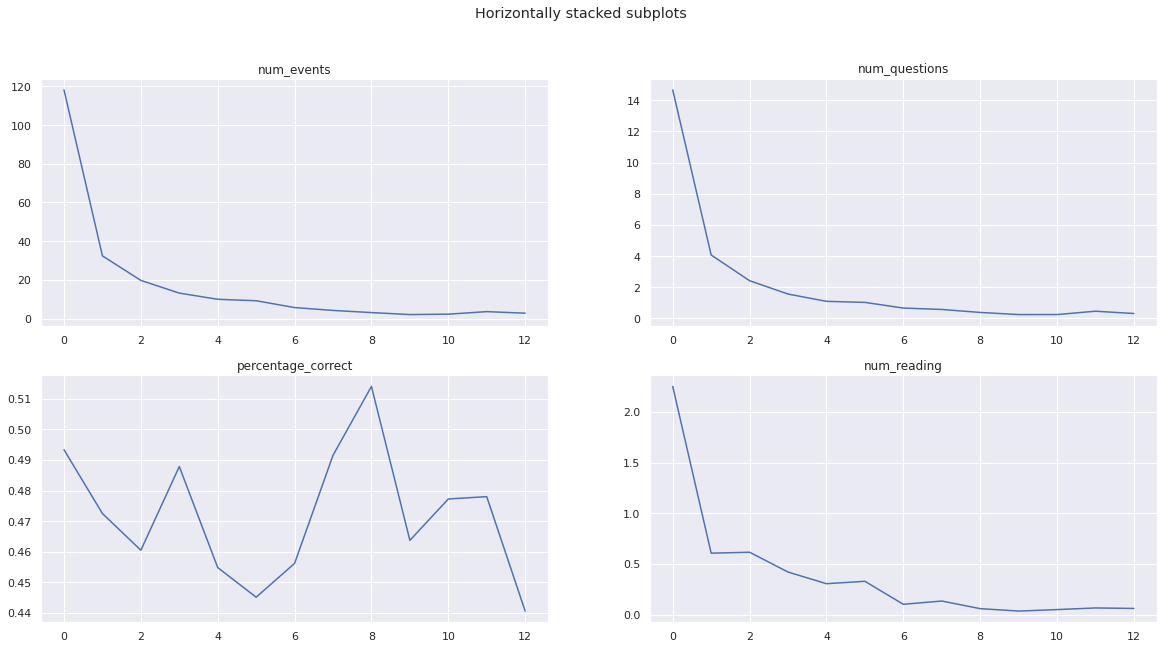

In [47]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2)
fig.suptitle('Horizontally stacked subplots')
ax1.plot(df_weeks.groupby('week').mean().index,df_weeks.groupby('week').mean()['num_events'])
ax1.set_title('num_events')
ax2.plot(df_weeks.groupby('week').mean().index,df_weeks.groupby('week').mean()[ 'num_questions'])
ax2.set_title('num_questions')
ax3.plot(df_weeks.groupby('week').mean().index,df_weeks.groupby('week').mean()[ 'percentage_correct'])
ax3.set_title('percentage_correct')
ax4.plot(df_weeks.groupby('week').mean().index,df_weeks.groupby('week').mean()[ 'num_reading'])
ax4.set_title('num_reading')
None

*Here we can see the behaviour of features over weeks. While other features are obviously decreasing, because users with time stop using the platform, percentage_correct has another nature. The average value of this feature has a pick on the 9th week (the only one week with the value more than chance 50%). It can be explained by the fact that starting from 5th week (after introduction) users become familiar with the course. But last weeks they loose their concentration.*

Probably, it also can be explained by data specific, because alternations are not really significant.

# Task 4: Creative extension 

Please provide **one** new hypothesis you would like to explore with the data and visualization for it. Discuss your results: what do you observe? Do the results confirm your hypotheses? 



*Check a hypothesis that there is a difference between percentage of different event_types among two genders*

In [48]:
df_gen=pd.merge(events,users, how='inner',on='user_id').copy()

In [49]:
#Find top 10 actions for each gender
top_male=df_gen[df_gen['gender']=='MALE'].groupby('action').count().sort_values('event_id',ascending=False)[['event_id']][:10].copy()
top_female=df_gen[df_gen['gender']=='FEMALE'].groupby('action').count().sort_values('event_id',ascending=False)[['event_id']][:10].copy()
top_male.index==top_female.index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

***Top 10 actions for MALE are the same as top 10 actions for FEMALE (and even in the same order)***

In [50]:
#Find the relative value in each gender to be able to compare
top_male['part']=top_male['event_id']/top_male['event_id'].sum()
top_female['part']=top_female['event_id']/top_female['event_id'].sum()

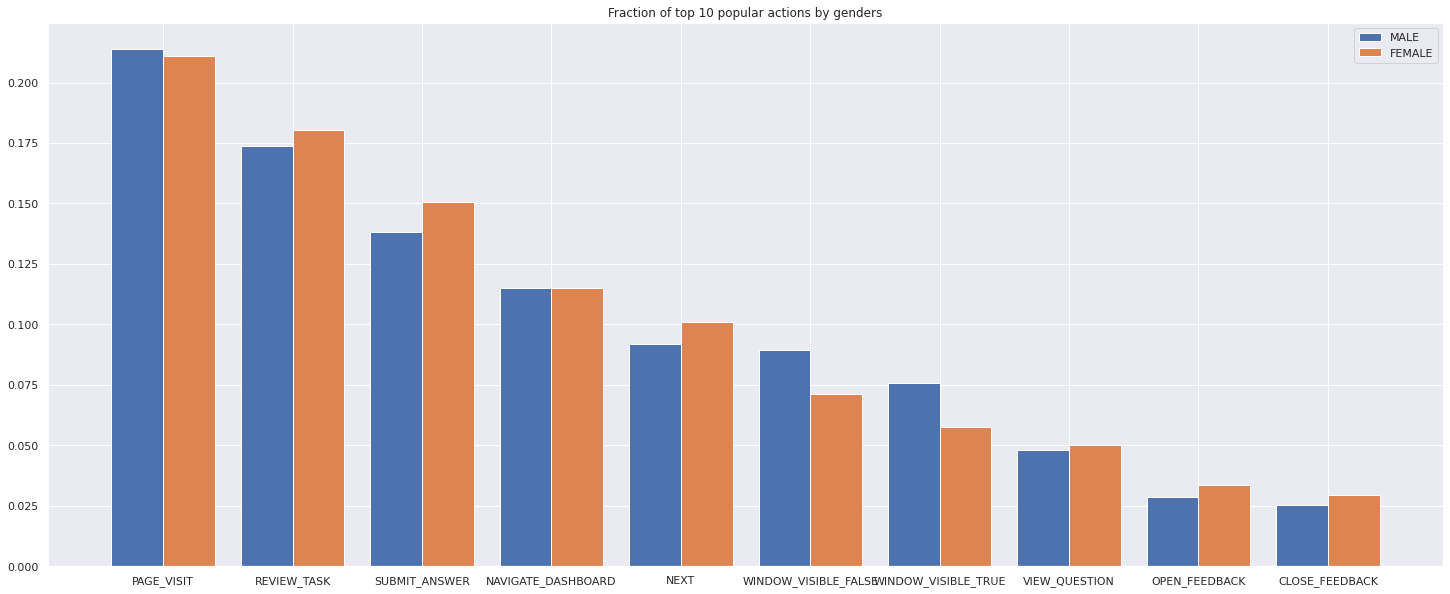

In [51]:
#Show the difference
fig, ax = plt.subplots(figsize=(25,10))
labels = list(top_male.index)
x1 = np.arange(0, 10) - 0.2
x2 = np.arange(0, 10) + 0.2
ax.bar(x1, top_male['part'], width = 0.4)
ax.bar(x2, top_female['part'], width = 0.4)
plt.xticks((x1+x2)/2, labels)
ax.legend(["MALE", "FEMALE"])
ax.set_title('Fraction of top 10 popular actions by genders')
None

*As we can see from the graph above, women are more likely to do such actions as REVIEV_TASK,SUBMIT_ANSWER,NEXT,OPEN/CLOSE FEEDBACK, while men are more likely do such actions as WINDOW_VISIBLE_FALSE,WINDOW_VISIBLE_TRUE,PAGE_VISIT. It is quite hard to make any conclusion from that, but possibly it can mean that women are a little bit more deligent:actions they prevail are more about learning process itself.*

*As we started analyzing genders, let's go a little bit further. It is interesting to see distributions of correct answers per gender.*

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


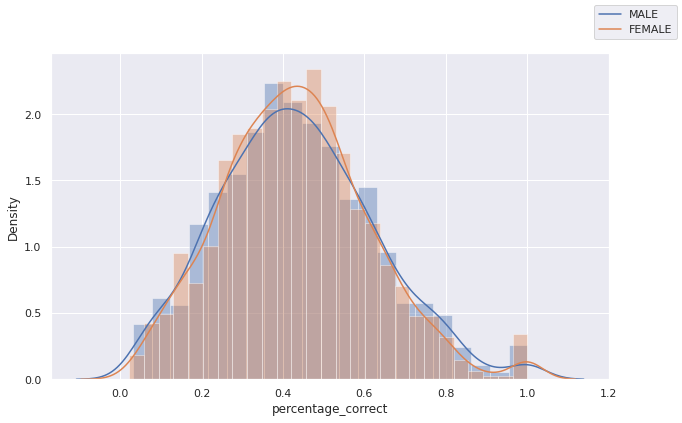

In [52]:
fig = plt.figure(figsize=(10,6))
sns.distplot(df[df['gender']=='MALE']['percentage_correct'])
sns.distplot(df[df['gender']=='FEMALE']['percentage_correct'])
fig.legend(labels=['MALE','FEMALE'])
None

*Female users are more likely to answer correctly about 30-60% of questions, while male users are more likely to answer correctly more than 70% or less than 20% of questions. Such a very interesting result.*